In [1]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
import math
from tsmom_model import *
import numpy as np
from datetime import datetime
import statsmodels.formula.api as sm
from sklearn.decomposition import PCA
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Data load
Hand cleaned to removed duplicates.  

In [2]:
cleansed=load_amihud_markets_price()
amihud=calculate_amihud_liquidity(cleansed)[:'2016'] 

tsmom_model.py:146: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data=pd.read_csv('../Price.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:148: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  qd=pd.read_csv('../liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:29: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data=pd.read_csv('../Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='mean')
tsmom_model.py:31: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  v=pd.read_csv('../volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='sum')
tsmom_model.py:33: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100

# PCA Analysis


In [3]:
ind=amihud['Soybean Oil'].dropna().index
temp=amihud.ix[ind].dropna(axis=1)

In [4]:
x=temp.max()
x.sort()
removed_noise=x.tail(5).index
temp=temp[temp.columns-removed_noise]

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from IPython.kernel.zmq import kernelapp as app
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [5]:
ct=amihud.count()
ct.sort()
ct[ct>200].head()

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from IPython.kernel.zmq import kernelapp as app


BMF-ARABICA COFFEE    203
CBT-WHEAT C.01 DEA    206
Soybean Oil           206
Feeder Cattle         206
S&P MidCap 400        206
dtype: int64

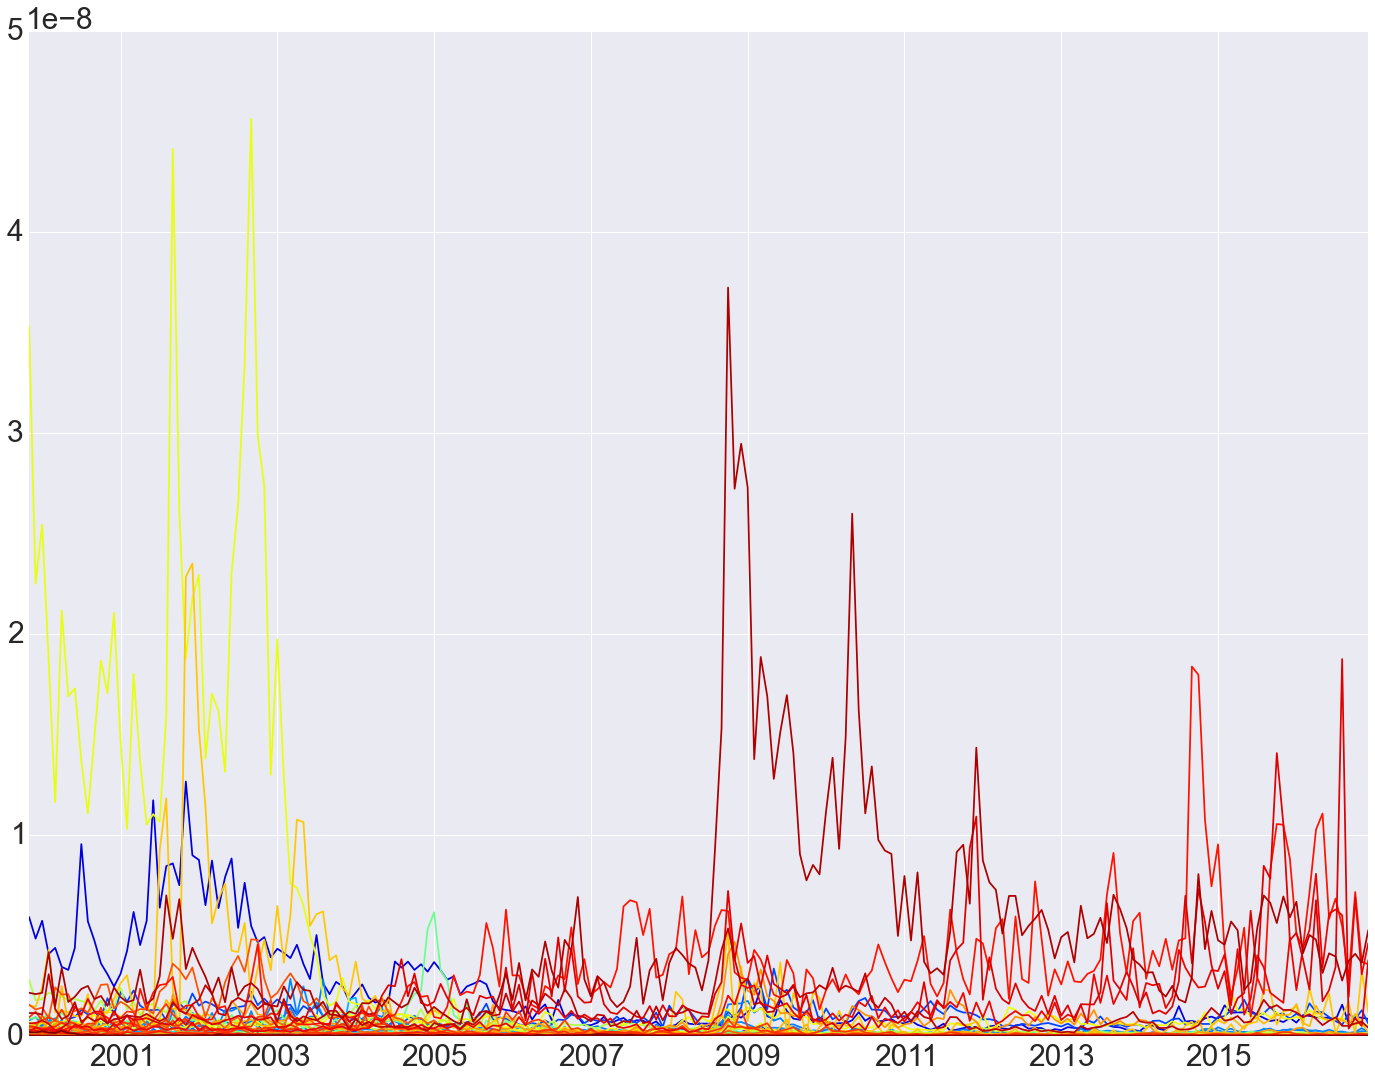

In [6]:
temp.plot(colormap='jet',legend=False)

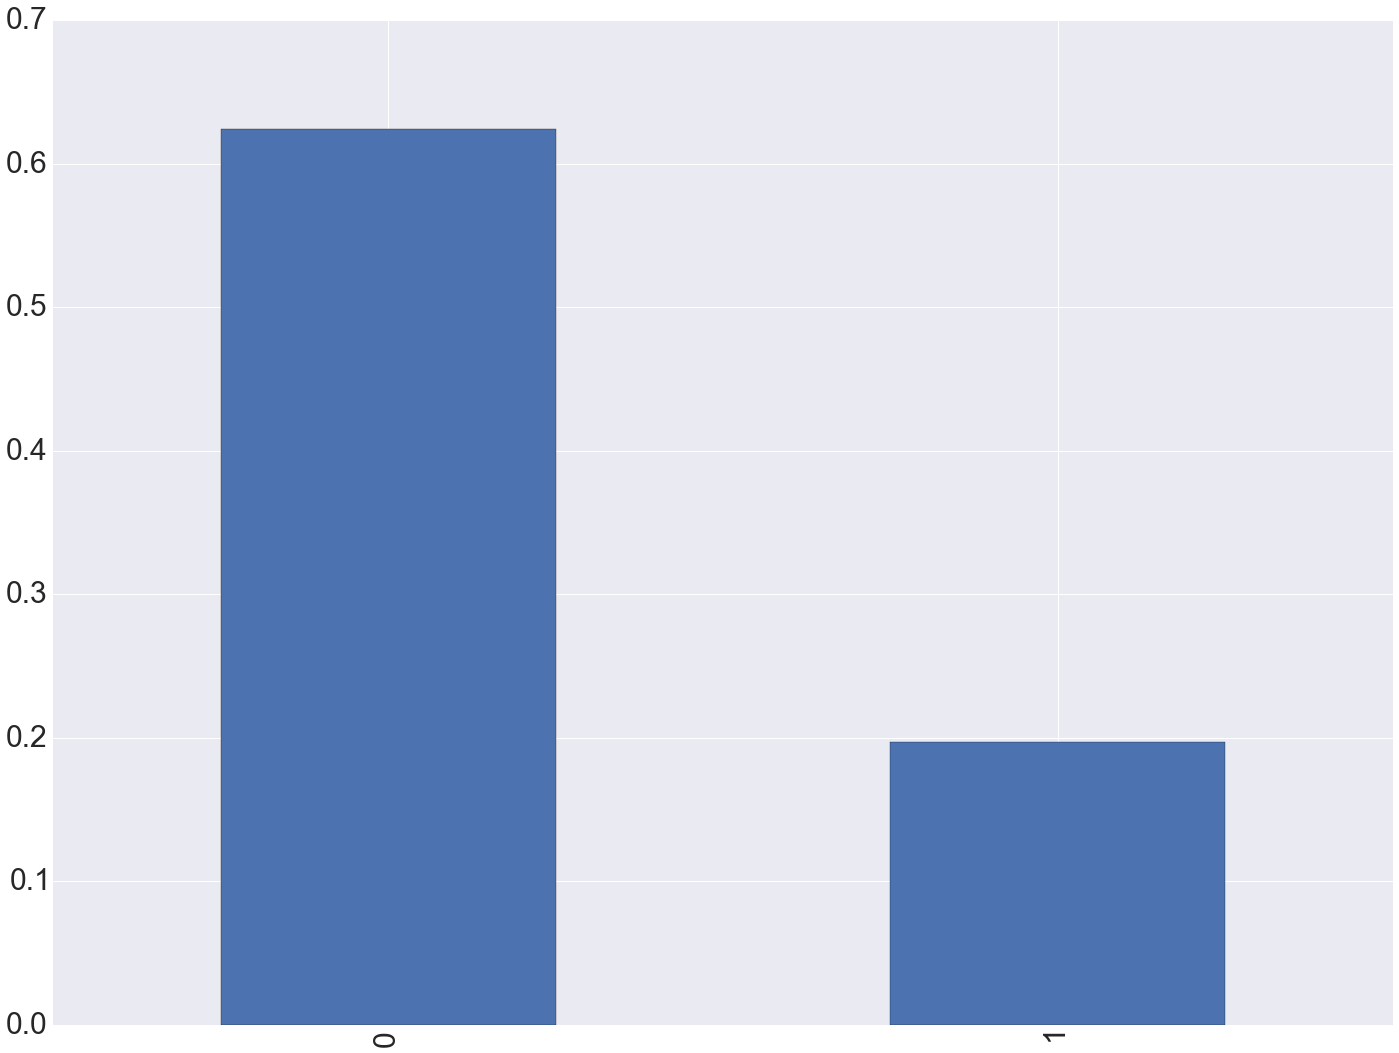

In [7]:
components=2
pca=PCA(n_components=components)
pca.fit(temp)
pd.Series(pca.explained_variance_ratio_).plot(kind='bar')

In [8]:
pca.explained_variance_ratio_

array([ 0.62409544,  0.19697883])

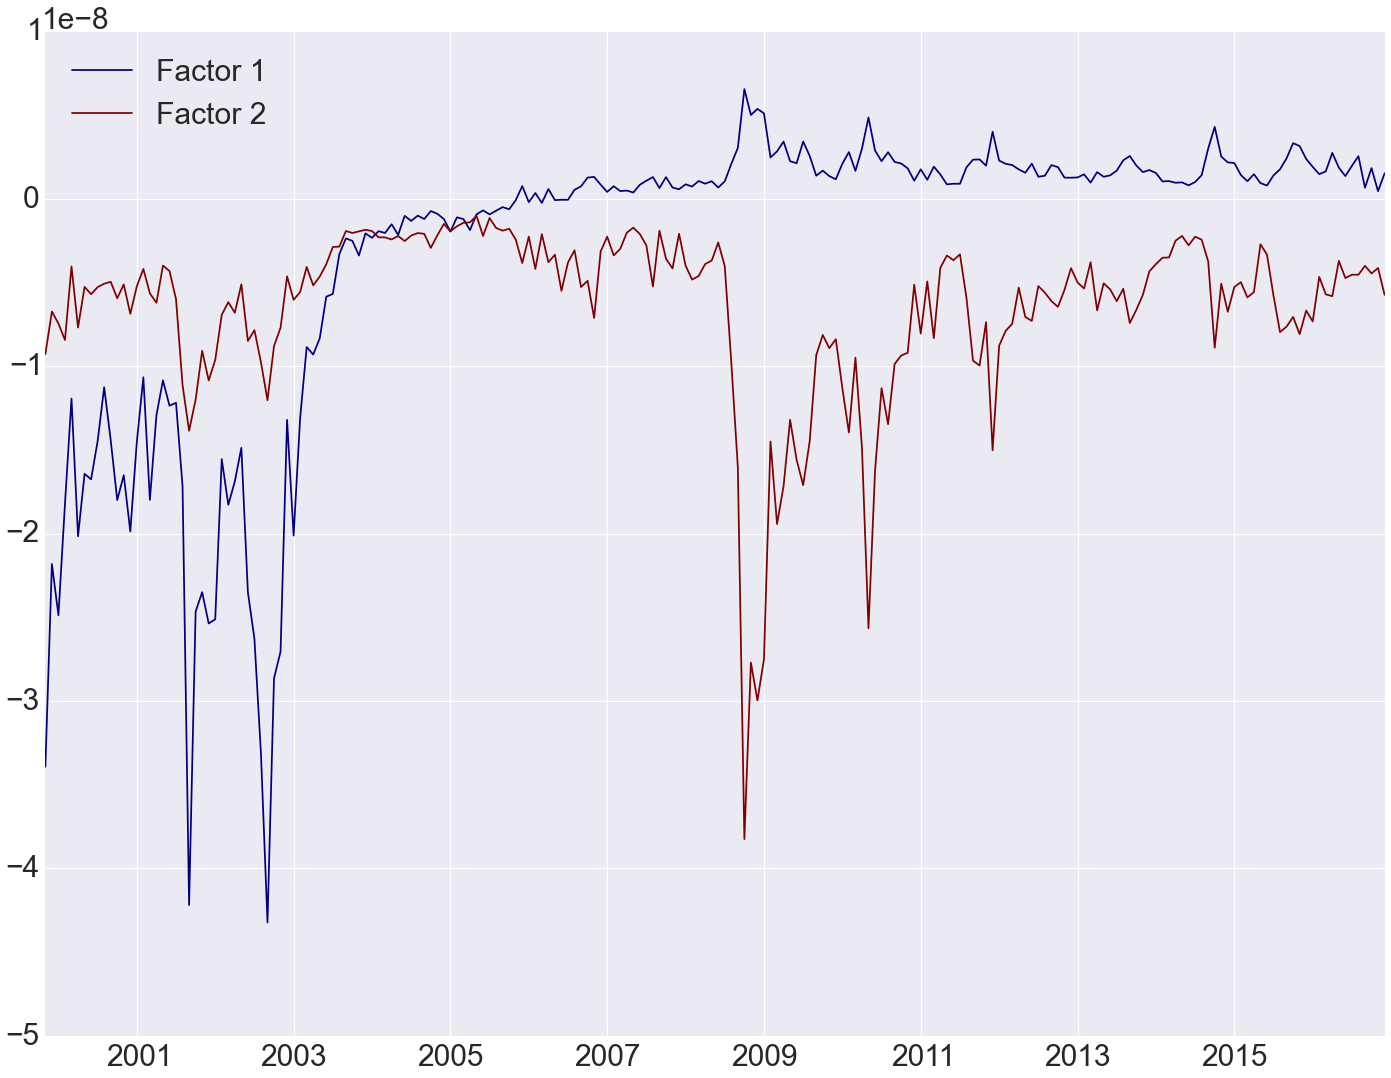

In [9]:
factor_rts=pd.DataFrame()
for i in range(0,components,1):
    q=pca.components_[i]
    factor_rts['Factor '+str(i+1)]=(q*temp.dropna()).sum(axis=1)
factor_rts.plot(colormap='jet')

In [25]:
FF_daily=pd.read_csv('../FF.csv',parse_dates=['Date'],index_col=0)
FF_monthly=FF_daily.resample(rule='m',how='sum')/100.

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  from IPython.kernel.zmq import kernelapp as app


In [ ]:
for f in FF_monthly.columns:
    factor_rts[f]=FF_monthly[f]
sns.clustermap(factor_rts.corr())

/Users/mrefermat/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


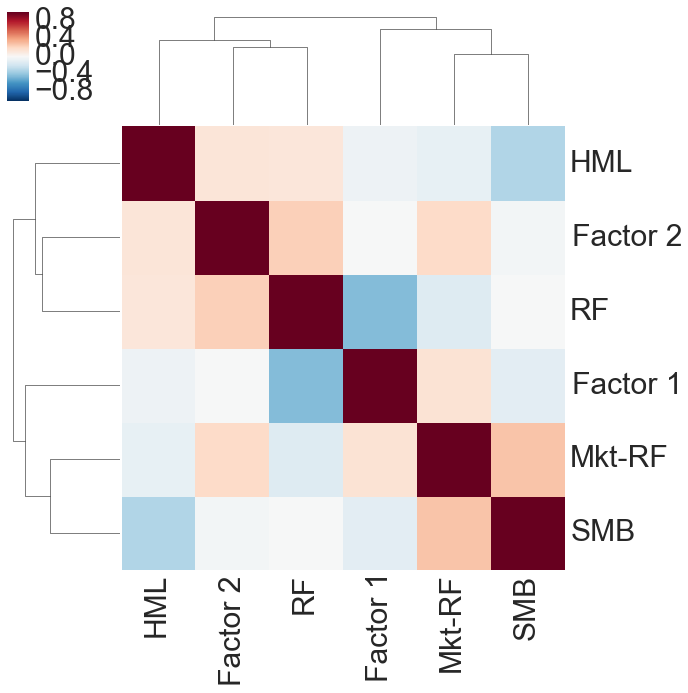

In [29]:
for f in FF_monthly.columns:
    factor_rts[f]=FF_monthly[f]
sns.clustermap(factor_rts.corr())

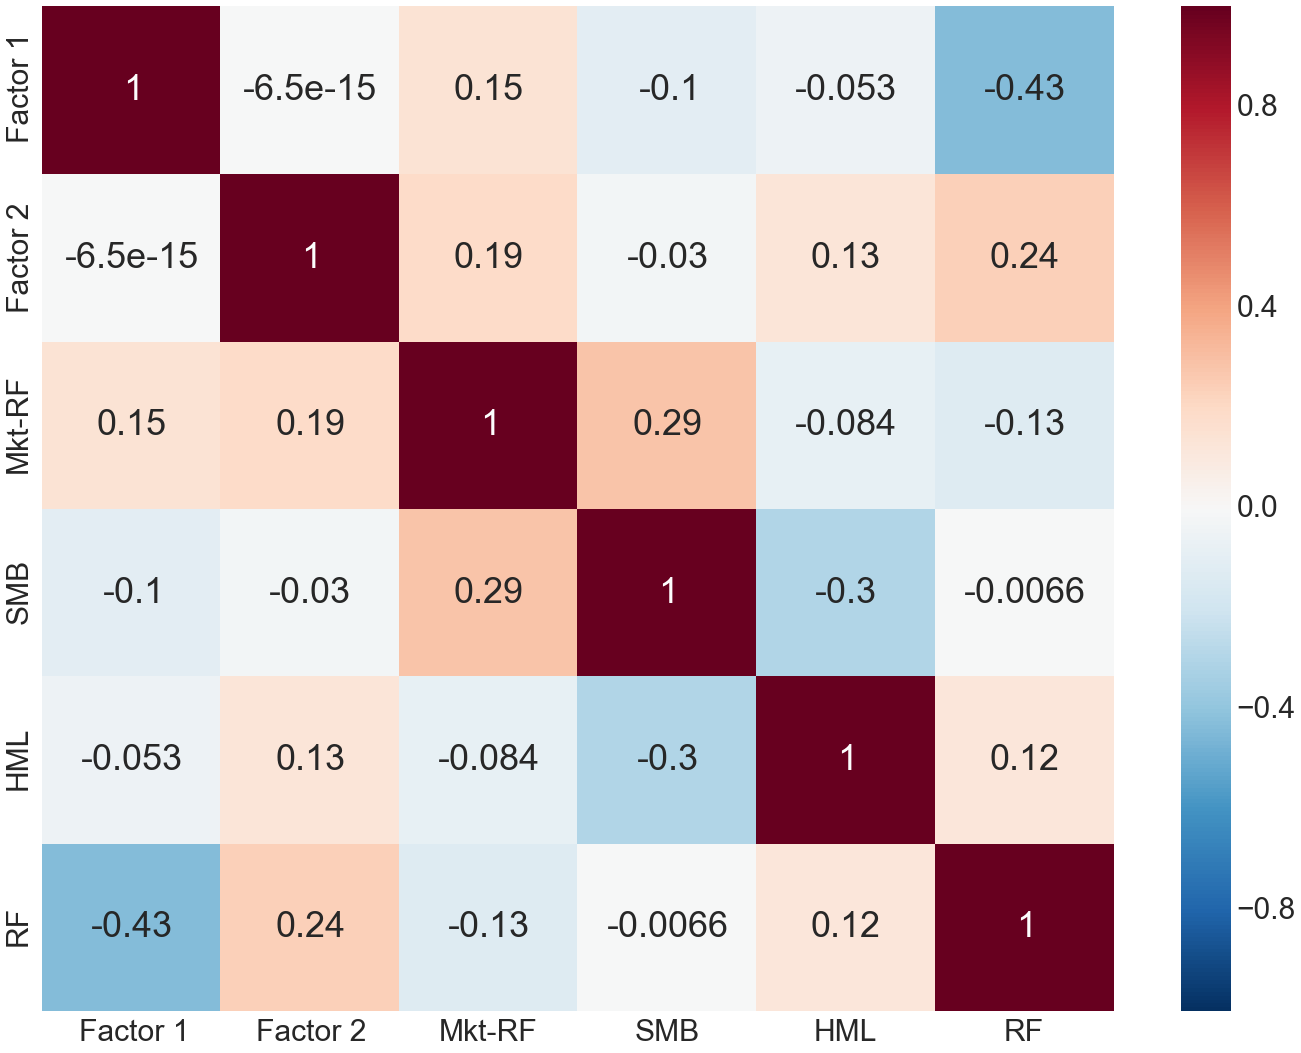

In [32]:
sns.heatmap(factor_rts.corr(),annot=True)

In [37]:
a=factor_rts.corr()
print a.round(2).to_latex()

\begin{tabular}{lrrrrrr}
\toprule
{} &  Factor 1 &  Factor 2 &  Mkt-RF &   SMB &   HML &    RF \\
\midrule
Factor 1 &      1.00 &     -0.00 &    0.15 & -0.10 & -0.05 & -0.43 \\
Factor 2 &     -0.00 &      1.00 &    0.19 & -0.03 &  0.13 &  0.24 \\
Mkt-RF   &      0.15 &      0.19 &    1.00 &  0.29 & -0.08 & -0.13 \\
SMB      &     -0.10 &     -0.03 &    0.29 &  1.00 & -0.30 & -0.01 \\
HML      &     -0.05 &      0.13 &   -0.08 & -0.30 &  1.00 &  0.12 \\
RF       &     -0.43 &      0.24 &   -0.13 & -0.01 &  0.12 &  1.00 \\
\bottomrule
\end{tabular}



# Things to do
* Run regresssions on factors on the market factors.  
* Have a look what Pastor and Stambaugh do as well.  

In [38]:
PS=pd.read_csv('../PS.csv',parse_dates=[0]).set_index('Month').resample(rule='m',how='last')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


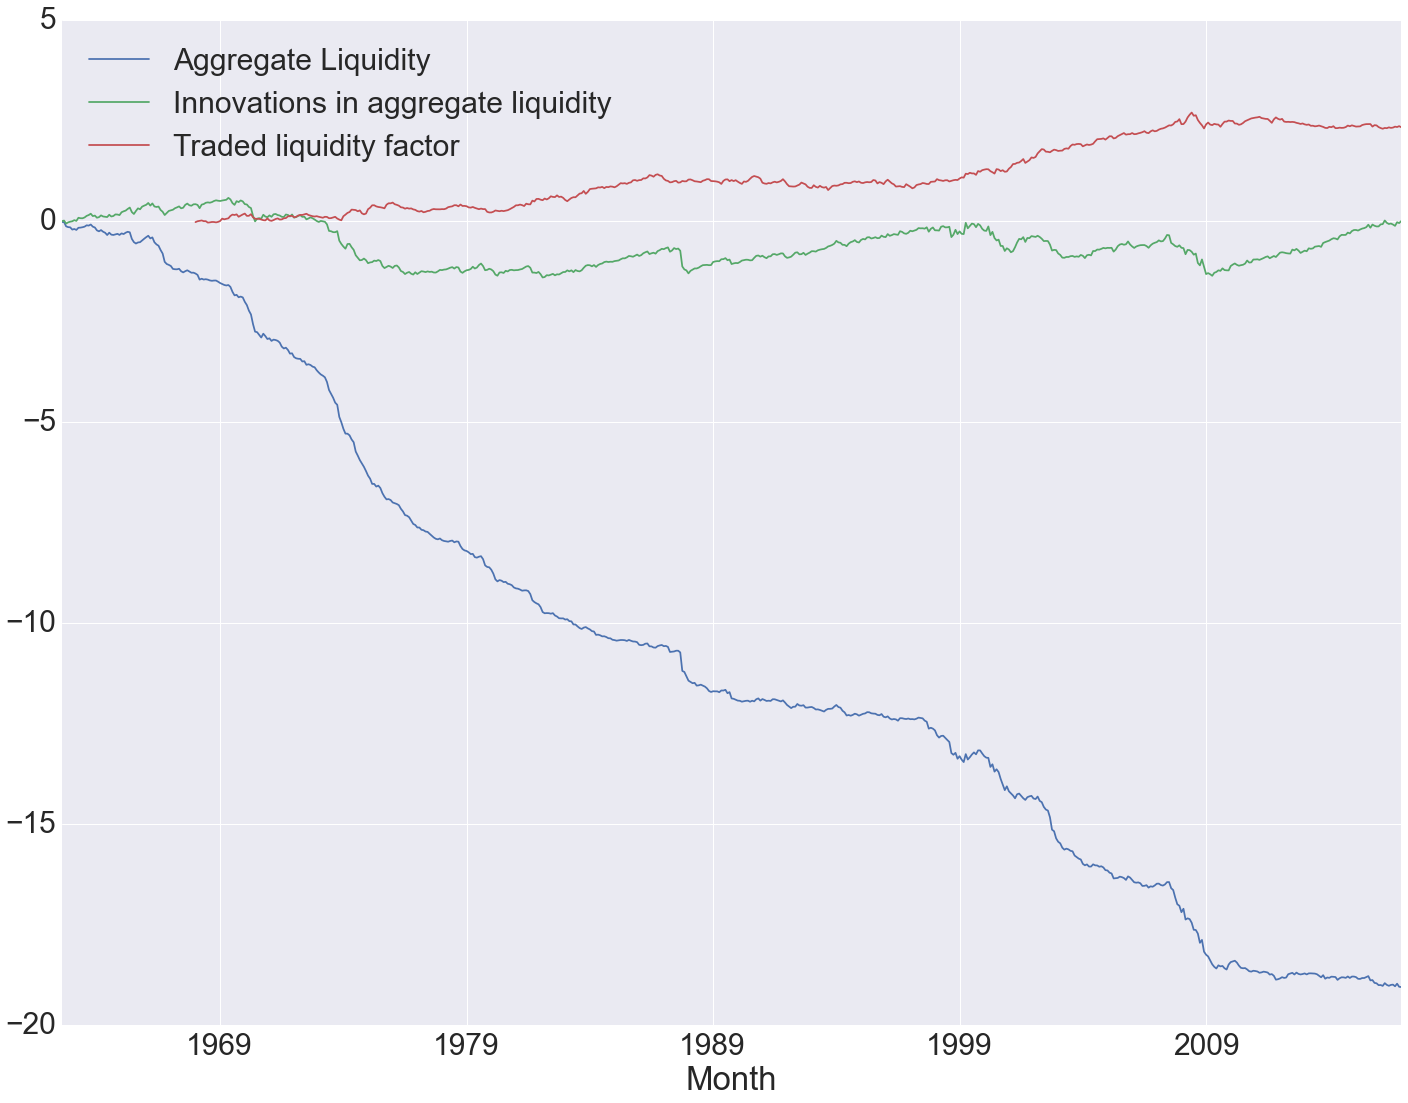

In [40]:
PS.cumsum().plot()

In [42]:

for f in FF_monthly.columns:
    factor_rts[f]=FF_monthly[f]
sns.clustermap(factor_rts.corr())

,Aggregate Liquidity,Innovations in aggregate liquidity,Traded liquidity factor
Month,,,
2016-08-31,0.006874,-0.024741,0.007565
2016-09-30,-0.040977,-0.033115,0.023534
2016-10-31,0.064108,0.090573,-0.010080
2016-11-30,-0.076879,-0.021436,0.022719
2016-12-31,-0.006656,0.049326,-0.027085


/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


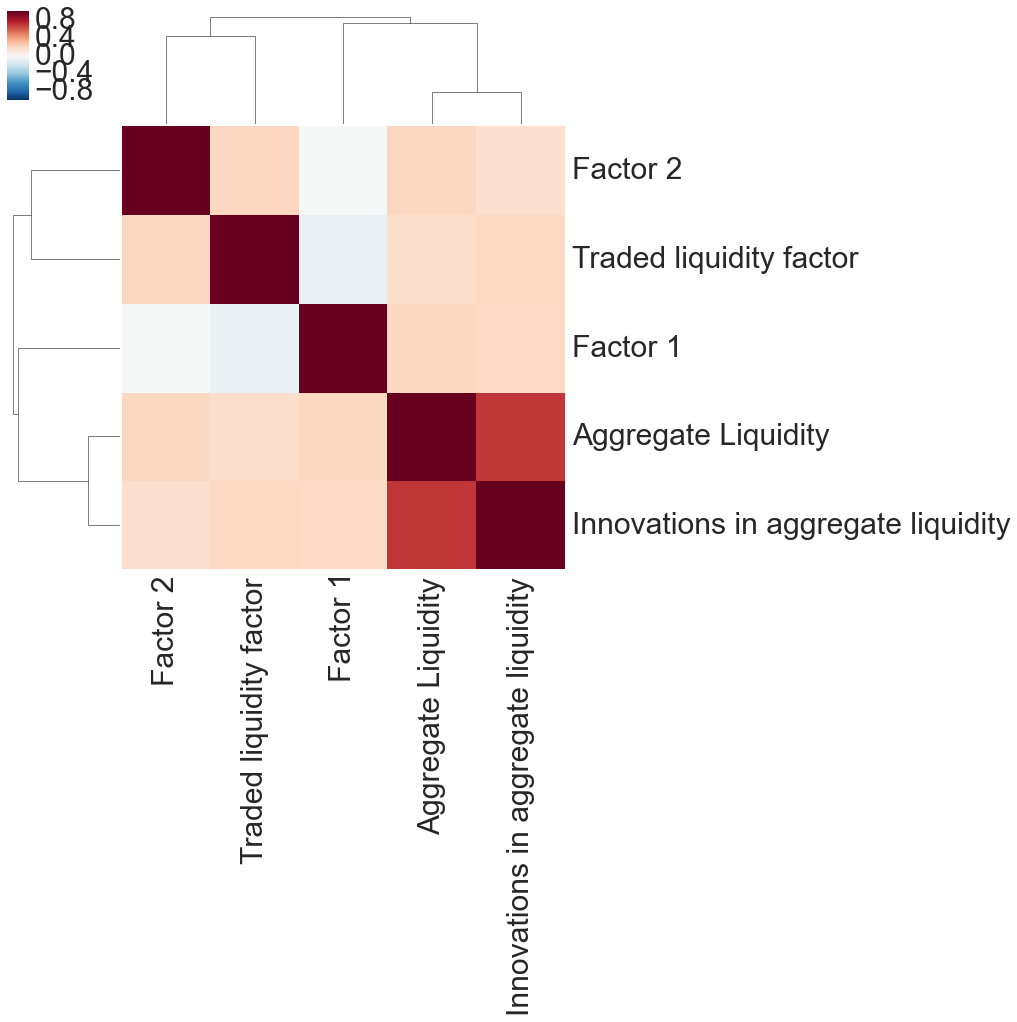

In [49]:
df=factor_rts[['Factor 1', 'Factor 2']]

for f in PS.columns:
    df[f]=PS[f]
sns.clustermap(df.corr())

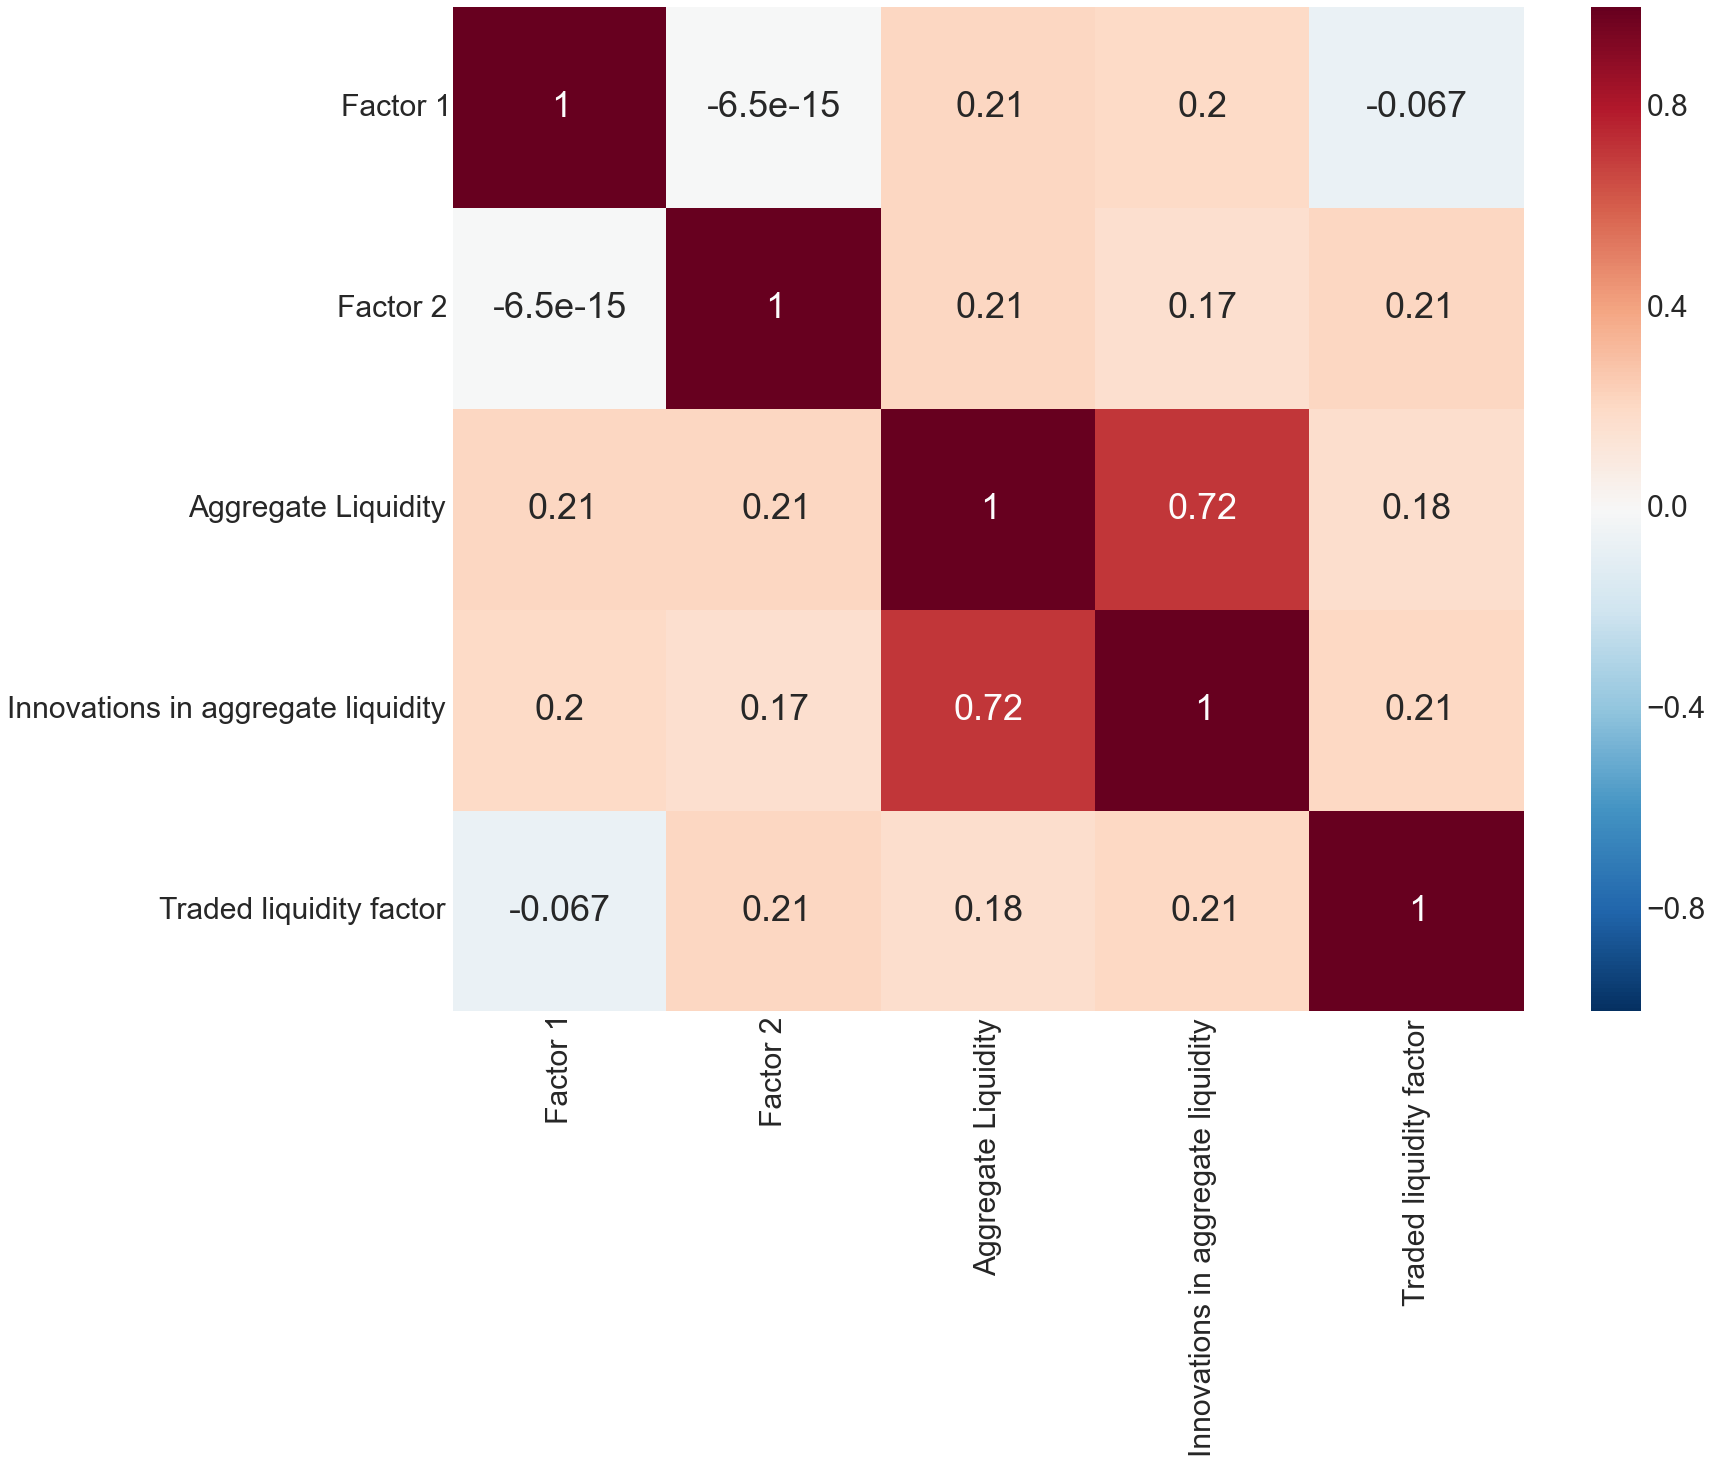

In [50]:
sns.heatmap(df.corr(),annot=True)

In [55]:
a=df.corr()
print a[['Factor 1', 'Factor 2']].round(2).to_latex()

\begin{tabular}{lrr}
\toprule
{} &  Factor 1 &  Factor 2 \\
\midrule
Factor 1                           &      1.00 &     -0.00 \\
Factor 2                           &     -0.00 &      1.00 \\
Aggregate Liquidity                &      0.21 &      0.21 \\
Innovations in aggregate liquidity &      0.20 &      0.17 \\
Traded liquidity factor            &     -0.07 &      0.21 \\
\bottomrule
\end{tabular}

